# Euler-Lagrange Equation

$$
L = L(q,\dot{q},t)
$$

### Stationary-action principle

$$
S \equiv \int_{t1}^{t2} L(q,\dot{q},t) dt \ , \ \delta q = 0 \ , \ \dot{q} = \frac{dq}{dt}
$$

$$
\delta S = \int_{t1}^{t2}
\left [
\frac{\partial L}{\partial q} \delta q
+ \frac{\partial L}{\partial \dot{q}} \delta \dot{q}
\right ]
dt = 0
$$

$$
 =  \int_{t1}^{t2} \left[
\frac{\partial L}{\partial q} \delta q
+ \frac{\partial L}{\partial \dot{q}} \delta \frac{dq}{dt}
\right] dt
$$

$$
= \int_{t1}^{t2} 
\frac{\partial L}{\partial q} \delta q
dt
+
\int _{t1}^{t2} \frac{\partial L}{\partial \dot{q}} \frac{d}{dt} \delta q
 dt
$$

$$
= \int_{t1}^{t2}
\left[
\frac{\partial L}{\partial q} 
- \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right)
\right]
\delta q dt
+
\left[
\frac{\partial L}{\partial \dot{q}} \delta q
\right]_{t1}^{t2}
$$

$$
\therefore \frac{\partial L}{\partial q} - \frac{d}{dt} \frac{\partial L}{\partial \dot{q}} = 0\ , \ \because \delta q = 0
$$

## Harmonic-Oscillator (Classical)

$$
m \frac{d^2 x}{dt^2} + \gamma \frac{d^1 x}{dt^1} + k \frac{d^0 x}{dt^0} = 
\left[ m \frac{d^2}{dt^2} + \gamma \frac{d^1}{dt^1} + k \frac{d^0}{dt^0} \right]x = \hat{D}x = 0 \ , \ \gamma = 0
$$

$$
L = T - U
$$


$$
T = \frac{1}{2} m \left(\frac{dx}{dt} \right)^2
$$


$$
U = \frac{1}{2}kx^2
$$


$$
\therefore L = T - U = \frac{1}{2} m \left(\frac{dx}{dt} \right)^2 - \frac{1}{2}kx^2
$$


$$
\frac{\partial L}{\partial q} = \frac{\partial}{\partial q} \left(-\frac{1}{2} kx^2 \right) = -kx
$$

$$
\frac{\partial L}{\partial \dot{q}} = \frac{\partial}{\partial \dot{q}} \left(\frac{1}{2} m \dot{x}^2 \right) = m \dot{x}
$$

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) = \frac{d}{dt} m \dot{x} = m \ddot{x}
$$

$$
 \frac{\partial L}{\partial q} - \frac{d}{dt} \frac{\partial L}{\partial \dot{q}} = -kx - m \ddot{x} =  0
$$

$$
\therefore m \ddot{x} = -kx
$$

$$
m \frac{d^2 x}{dt^2} = -kx
$$

$$
\frac{d^2 x}{dt^2} = ( i \omega )^2 x \ , \ \omega^2 = \frac{k}{m}
$$

$$
\frac{dx}{dt} \left( \frac{d^2x}{dt^2} \right) = \frac{dx}{dt} (i \omega)^2 x
$$

$$
\frac{d}{dt} \left( \frac{dx}{dt} \right)^2 = \frac{d}{dt} (i \omega x)^2
$$

$$
\frac{dx}{dt} = i \omega x
$$

$$
\int \frac{1}{x} dx = i \omega \int dt
$$

$$
\log |x| = i \omega t + C \ , \ C = \textrm{arbitrary const.}
$$

$$
\therefore x(t) = x_0 e^{i \omega t} \ , \ x_0 = \pm e^C
$$

$$
v(t) = \frac{d}{dt} x(t) = i \omega x_0 e^{i \omega t} , \ \arg(i) = \frac{\pi}{2}
$$

## Harmonic-Oscillator (Quantum)

$$
i \hbar \frac{d}{dt}\psi = 
\left[
- \frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x)
\right] \psi = E \psi
$$

$$
V(x) = \frac{1}{2}k x^2 = \frac{1}{2} m \frac{k}{m} x^2 = \frac{1}{2} m \omega^2 x^2
$$

$$
\left( E - \frac{1}{2}m \omega^2 x^2 \right) \psi
= - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \psi
$$

$$
x = \sqrt{\frac{\hbar}{m \omega}} \xi
$$

$$
E = \frac{\hbar \omega}{2} \epsilon
$$

$$
\left(
\frac{\hbar \omega}{2} \epsilon - \frac{1}{2} m \omega^2 \frac{\hbar}{m \omega} \xi^2
\right) \phi
= -\frac{\hbar^2}{2m} \frac{m \omega}{\hbar} \frac{\partial^2}{\partial \xi^2} \phi
$$

$$
\frac{\hbar \omega}{2} ( \epsilon - \xi^2) \phi = - \frac{\hbar \omega}{2} \frac{\partial^2}{\partial \xi^2} \phi
$$

$$
\frac{\partial^2}{\partial xi^2} \phi + (\epsilon - \xi^2) \phi = 0
$$

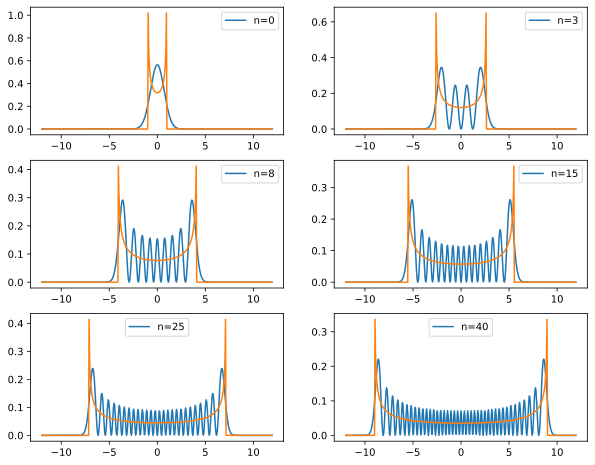

In [3]:
# https://chem.libretexts.org/Ancillary_Materials/Interactive_Applications/Jupyter_Notebooks/Quantum_Harmonic_Oscillators_-_Plotting_Eigenstates_(Python_Notebook)

import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

#Choose simple units
m=1.
w=1.
hbar=1.

#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)

def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi
  
def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
    x_inside = abs(x) < (x_max - 0.025)
    classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
    return classical_prob

plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(x, numpy.conjugate(stationary_state(x,0))*stationary_state(x,0), label="n=0")
plt.plot(x, classical_P(x,0))
plt.legend()
plt.subplot(3,2,2)
plt.plot(x, numpy.conjugate(stationary_state(x,3))*stationary_state(x,3), label="n=3")
plt.plot(x, classical_P(x,3))
plt.legend()
plt.subplot(3,2,3)
plt.plot(x, numpy.conjugate(stationary_state(x,8))*stationary_state(x,8), label="n=8")
plt.plot(x, classical_P(x,8))
plt.legend()
plt.subplot(3,2,4)
plt.plot(x, numpy.conjugate(stationary_state(x,15))*stationary_state(x,15), label="n=15")
plt.plot(x, classical_P(x,15))
plt.legend()
plt.subplot(3,2,5)
plt.plot(x, numpy.conjugate(stationary_state(x,25))*stationary_state(x,25), label="n=25")
plt.plot(x, classical_P(x,25))
plt.legend()
plt.subplot(3,2,6)
plt.plot(x, numpy.conjugate(stationary_state(x,40))*stationary_state(x,40), label="n=40")
plt.plot(x, classical_P(x,40))
plt.legend()
plt.show()